In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
# from mpl_toolkits.mplot3d import Axes3D


您说得对，我之前给出的示例代码中并没有直接使用`Axes3D`类。但是，即使没有直接使用`Axes3D`类，导入`mpl_toolkits.mplot3d`模块仍然是必要的，因为它会向Matplotlib注册三维投影类型，从而允许您在创建坐标轴时指定`projection='3d'`参数。

如果您没有导入`mpl_toolkits.mplot3d`模块，那么在创建坐标轴时指定`projection='3d'`参数将会导致错误。因此，即使您没有直接使用`Axes3D`类，导入`mpl_toolkits.mplot3d`模块仍然是必要的。

希望这些信息能够帮助您理解问题。

似乎并不是必要的, 我把这个导入注释了也能用.

In [4]:
# fig = plt.figure()

In [12]:
# ??plt.figure

In [13]:
# ??fig.gca

In [10]:
def plot_surf(xx,yy,zz,caption):

    norm_plt = plt.Normalize(zz.min(), zz.max())
    colors = cm.RdYlBu_r(norm_plt(zz))

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    surf = ax.plot_surface(xx,yy,zz,
                           facecolors=colors, shade=False)
    surf.set_facecolor((0,0,0,0))

    plt.show()
    ax.set_proj_type('ortho')
    
    if xx.min() == xx.max():
        ax.set_xlim(xx.min() - 4,xx.min() + 4)
    else:
        ax.set_xlim(xx.min(),xx.max())
    
    if yy.min() == yy.max():
        ax.set_ylim(yy.min() - 4,yy.min() + 4)
    else:
        ax.set_ylim(yy.min(),yy.max())
        
    if zz.min() == zz.max():
        ax.set_zlim(zz.min() - 4,zz.min() + 4)
    else:
        ax.set_zlim(zz.min(),zz.max())

    plt.tight_layout()
    ax.set_xlabel('$\it{x}$')
    ax.set_ylabel('$\it{y}$')
    ax.set_zlabel('$\it{z}$')
    ax.set_title(caption)
    ax.view_init(azim=-135, elev=30)
    ax.xaxis._axinfo["grid"].update({"linewidth":0.25, "linestyle" : ":"})
    ax.yaxis._axinfo["grid"].update({"linewidth":0.25, "linestyle" : ":"})
    ax.zaxis._axinfo["grid"].update({"linewidth":0.25, "linestyle" : ":"})

num = 33
x = np.linspace(-4,4,num)
y = np.linspace(-4,4,num)
xx,yy = np.meshgrid(x,y);

# plt.close('all')

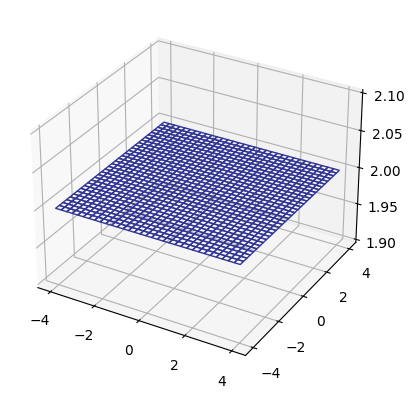

<Figure size 640x480 with 0 Axes>

In [11]:
#%% z - 2 = 0
zz = 2 + xx*0;
caption = '$z - 2 = 0$';
plot_surf (xx,yy,zz,caption)

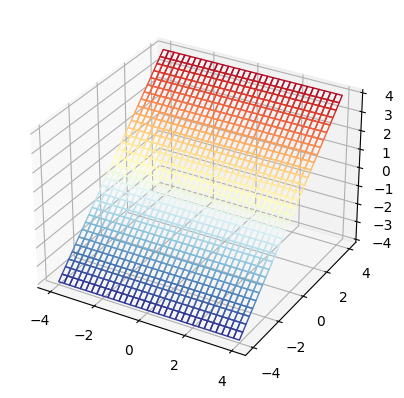

<Figure size 640x480 with 0 Axes>

In [12]:
#%% y - z = 0
zz = yy;
caption = '$z - y = 0$';
plot_surf (xx,yy,zz,caption)

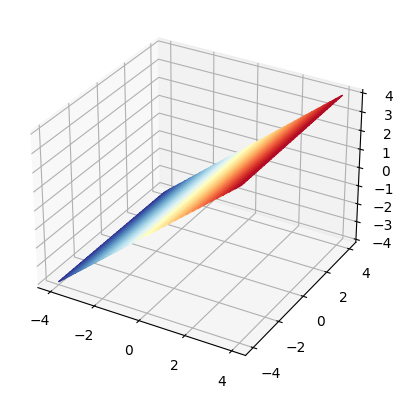

<Figure size 640x480 with 0 Axes>

In [13]:
#%% x - z = 0
zz = xx;
caption = '$x - z = 0$';
plot_surf (xx,yy,zz,caption)

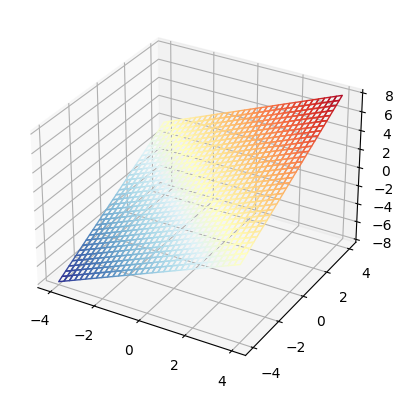

<Figure size 640x480 with 0 Axes>

In [14]:
#%% x + y - z = 0
zz = xx + yy;
caption = '$x + y - z = 0$';
plot_surf (xx,yy,zz,caption)

In [19]:
#%% vertical mesh plot
x = np.linspace(-4,4,num)
z = np.linspace(-4,4,num)
xx,zz = np.meshgrid(x,z);

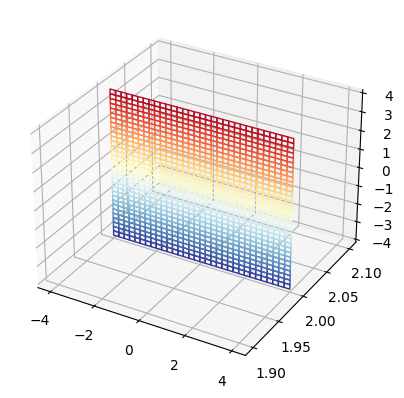

<Figure size 640x480 with 0 Axes>

In [20]:
#%% y - 2 = 0
yy = 2 - xx*0
caption = '$y - 2 = 0$';
plot_surf (xx,yy,zz,caption)

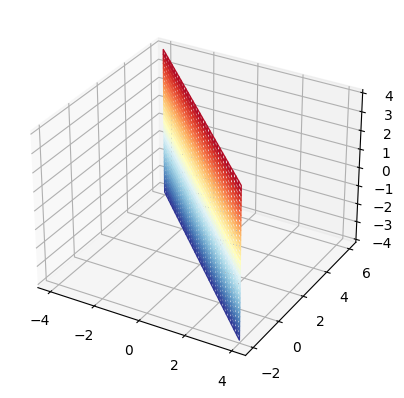

<Figure size 640x480 with 0 Axes>

In [21]:
#%% x + y - 2 = 0
yy = 2 - xx
caption = '$x + y - 2 = 0$';
plot_surf (xx,yy,zz,caption)

In [22]:
#%% x + 2 = 0
y = np.linspace(-4,4,num)
z = np.linspace(-4,4,num)
yy,zz = np.meshgrid(y,z);

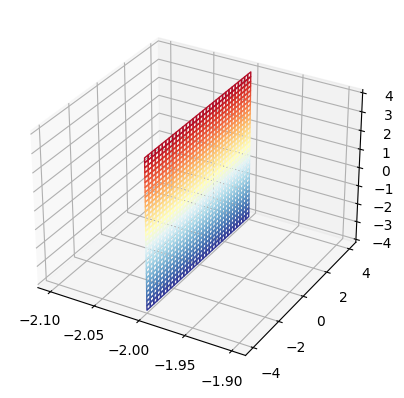

<Figure size 640x480 with 0 Axes>

In [23]:
xx = -2 - yy*0
caption = '$x + 2 = 0$';
plot_surf (xx,yy,zz,caption)

In [2]:
# ??fig.gca

Object `fig.gca` not found.


In [17]:
# !streamlit run C:\Anaconda3\envs\math\Lib\site-packages\ipykernel_launcher.py

^C


In [6]:
# dir(fig.gca)

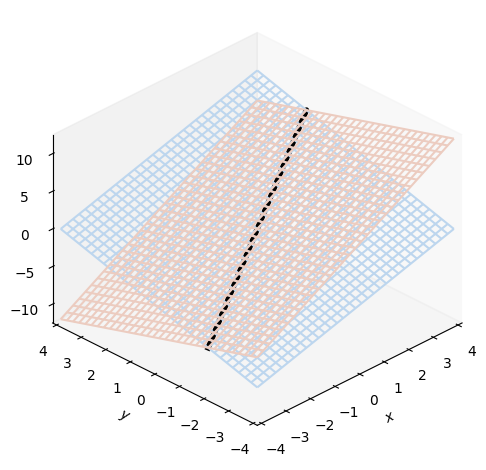

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt

num = 33
x = np.linspace(-4,4,num)
y = np.linspace(-4,4,num)
xx,yy = np.meshgrid(x,y);

plt.close('all')

zz1 = xx + yy;
zz2 = 2*xx - yy;

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

CS = ax.contour(xx,yy, zz1 - zz2, levels = [0],
           colors = '#339933')
ax.cla()  

ax.plot_wireframe(xx, yy, zz1, color = '#BDD6EE') 
# , rstride=10, cstride=10
ax.plot_wireframe(xx, yy, zz2, color = '#ECCCC0') 

# plot the intersection line

for i in range(0,len(CS.allsegs[0])):

    contour_points_x_y = CS.allsegs[0][i]
    
    contour_points_z = (contour_points_x_y[:,0] + 
                        contour_points_x_y[:,1])

    ax.plot3D(contour_points_x_y[:,0],
              contour_points_x_y[:,1], 
              contour_points_z,
              color = 'k',
              linewidth = 4)

ax.set_proj_type('ortho')

ax.set_xlim(xx.min(),xx.max())
ax.set_ylim(yy.min(),yy.max())

plt.tight_layout()
ax.set_xlabel('$\it{x}$')
ax.set_ylabel('$\it{y}$')
ax.set_zlabel('$\it{z}$')

ax.view_init(azim=-135, elev=30)
ax.grid(False)


In [7]:
# dir(ax)

In [31]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# define three visualization tools
# ========================
# 3D contour plot of zz
# ========================

def plot_3D_f_xy(xx,yy,zz):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(projection='3d')
    
    ax.plot_wireframe(xx,yy, zz,
                    color = [0.75,0.75,0.75],
                    cmap='RdYlBu_r',
                    rstride=20, cstride=20,
                    linewidth = 0.25)
    
    l_max = max(np.max(zz),-np.min(zz))
    levels = np.linspace(-l_max,l_max,21)
    ax.contour(xx, yy, zz, levels = levels, cmap = 'RdYlBu_r')
    
    # plot decision boundary
    ax.contour(xx, yy, zz, levels = [0], 
                colors=['k'])
    
    ax.set_proj_type('ortho')
    
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
    
    plt.tight_layout()
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('f($x_1$,$x_2$)')
    ax.view_init(azim=-120, elev=30)
    ax.grid(False)

# ========================
# Wireframe plot of mask
# ========================

def plot_3D_mask(xx,yy,mask):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(projection='3d')
    
    ax.plot_wireframe(xx,yy, mask,
                    cmap='RdYlBu_r',
                    rstride=20, cstride=20,
                    linewidth = 0.25)
    
    ax.set_proj_type('ortho')
    
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
    ax.set_zlim(0,1.2)
    
    plt.tight_layout()
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('[0,1]')
    ax.set_zticks([0,1])
    ax.view_init(azim=-120, elev=30)
    ax.grid(False)

# ========================
# 2D contour plot
# ========================

def plot_2D_contour(xx,yy,zz,mask):
    
    # Create color maps
    rgb = [[255, 238, 255],  # red
           [219, 238, 244]]  # blue
    rgb = np.array(rgb)/255.
    
    cmap_light = ListedColormap(rgb)
    
    fig, ax = plt.subplots(figsize = (8,8))
    l_max = max(np.max(zz),-np.min(zz))
    levels = np.linspace(-l_max,l_max,21)
    plt.contourf(xx, yy, mask, cmap=cmap_light)
    plt.contour(xx, yy, zz, levels = levels, cmap = 'RdYlBu_r')
    
    # plot decision boundary
    plt.contour(xx, yy, zz, levels = [0], 
                colors=['k'])
    
    # Figure decorations
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    ax.grid(linestyle='--', linewidth=0.25, color=[0.5,0.5,0.5])
    # plt.axis('equal')
    # plt.show()
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

#%%

num = 500
x = np.linspace(-4,4,num)
y = np.linspace(-4,4,num)
xx,yy = np.meshgrid(x,y);

# plt.close('all')

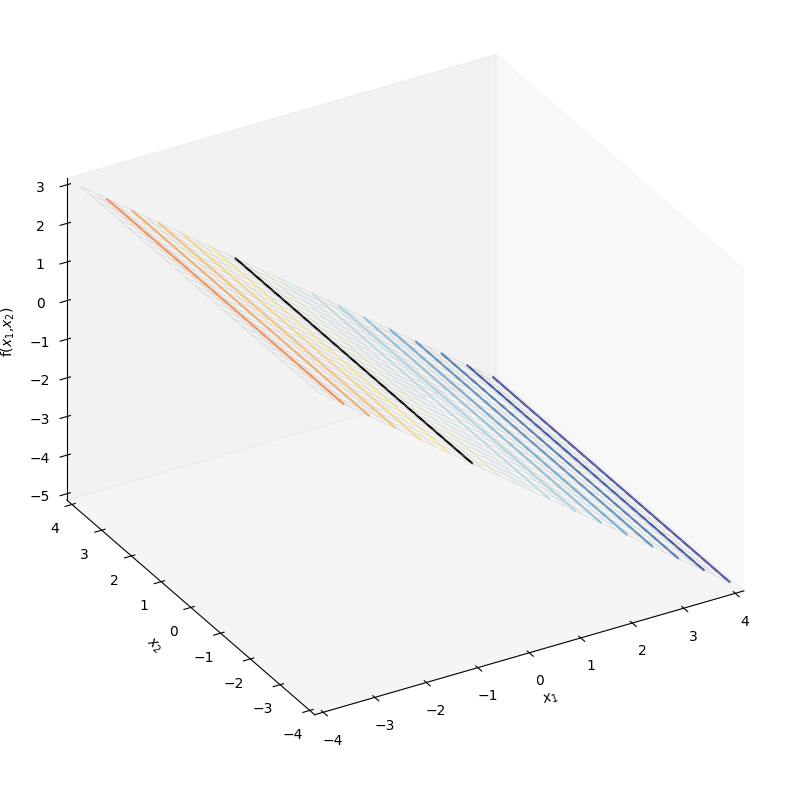

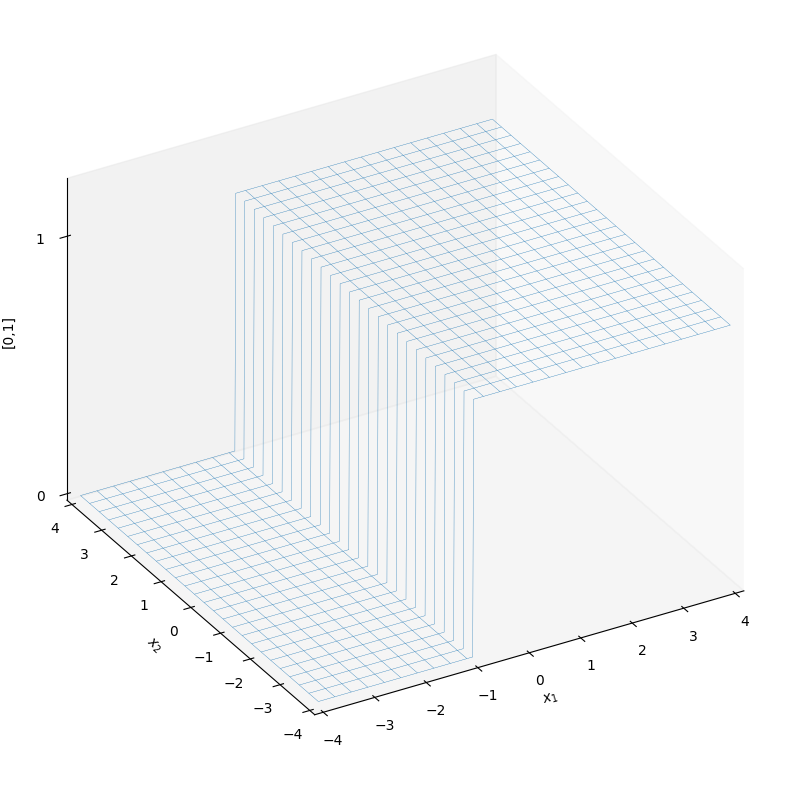

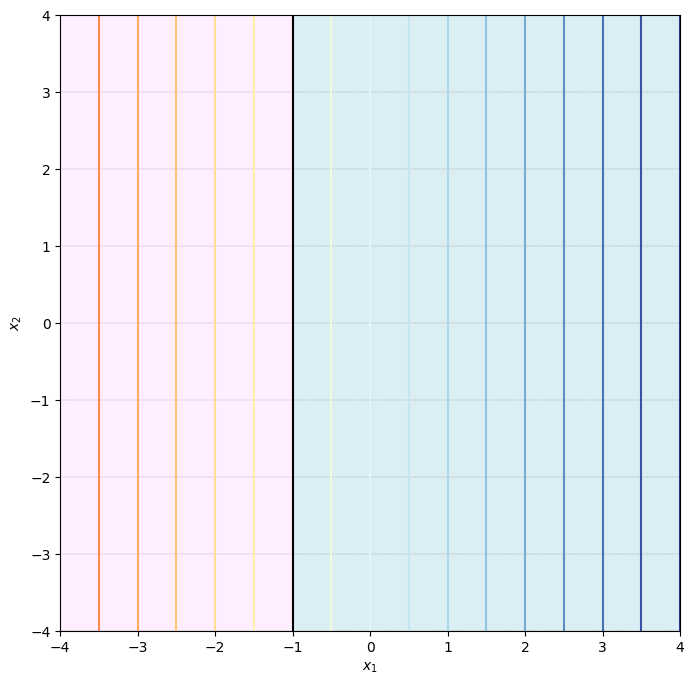

In [32]:
#%% x1 + 1 > 0
zz = -xx - 1
# satisfy the inequality: 1
# otherwise: 0
mask_less_than_0 = (zz < 0) + 0

plot_3D_f_xy(xx,yy,zz)
plot_3D_mask(xx,yy,mask_less_than_0)
plot_2D_contour(xx,yy,zz,mask_less_than_0)

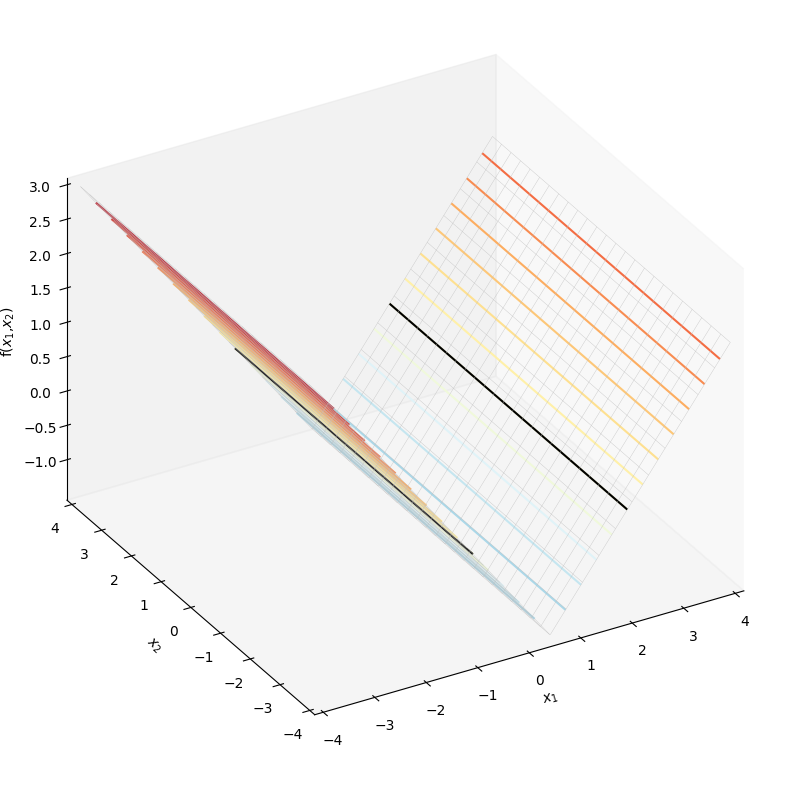

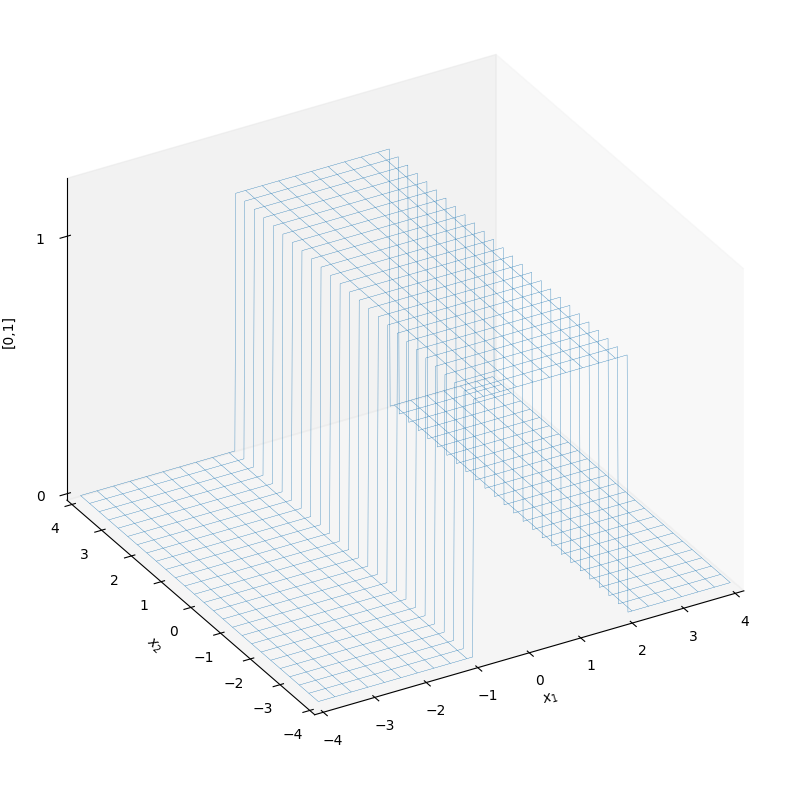

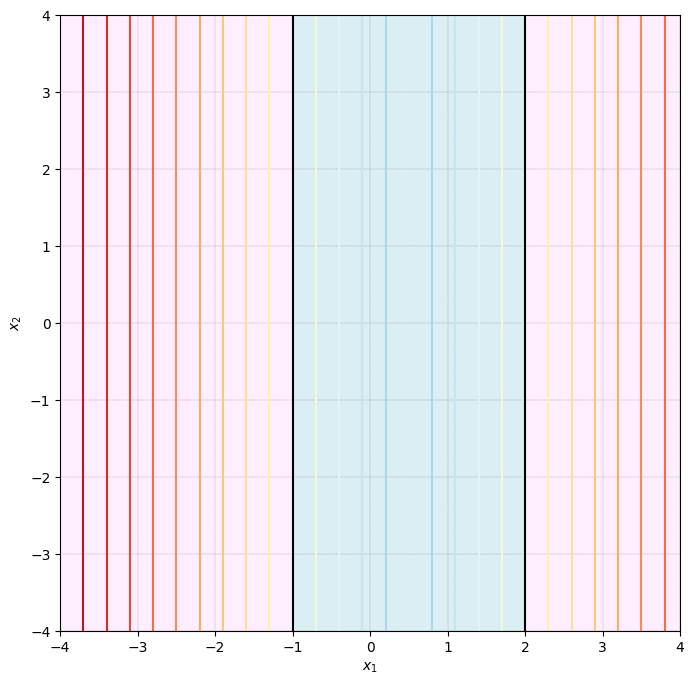

In [33]:
#%% -1 < x1 < 2
zz = np.abs(xx - 0.5) - 1.5
mask_less_than_0 = (zz < 0) + 0

plot_3D_f_xy(xx,yy,zz)
plot_3D_mask(xx,yy,mask_less_than_0)
plot_2D_contour(xx,yy,zz,mask_less_than_0)

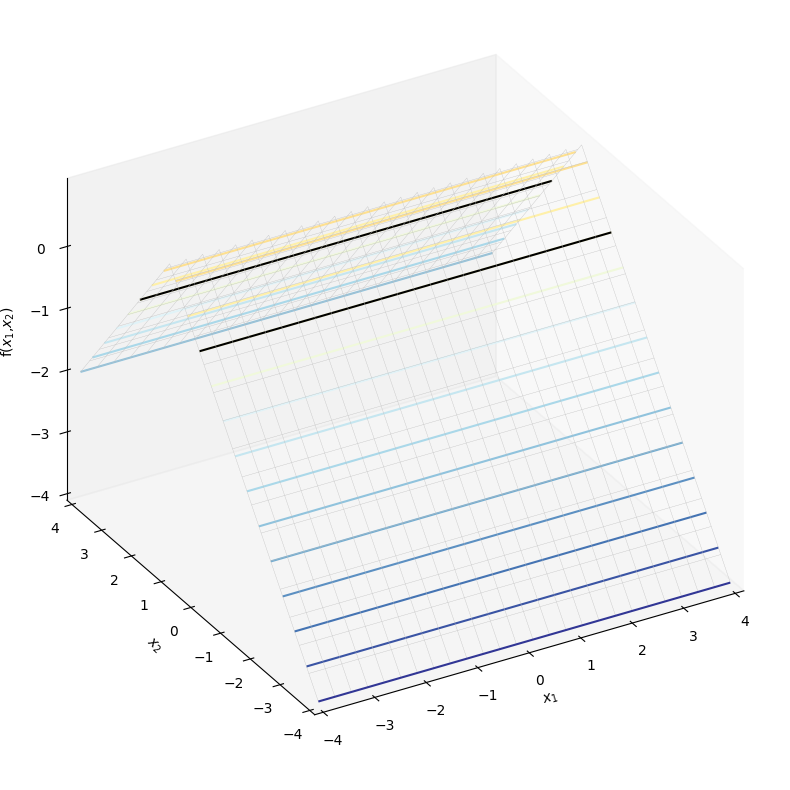

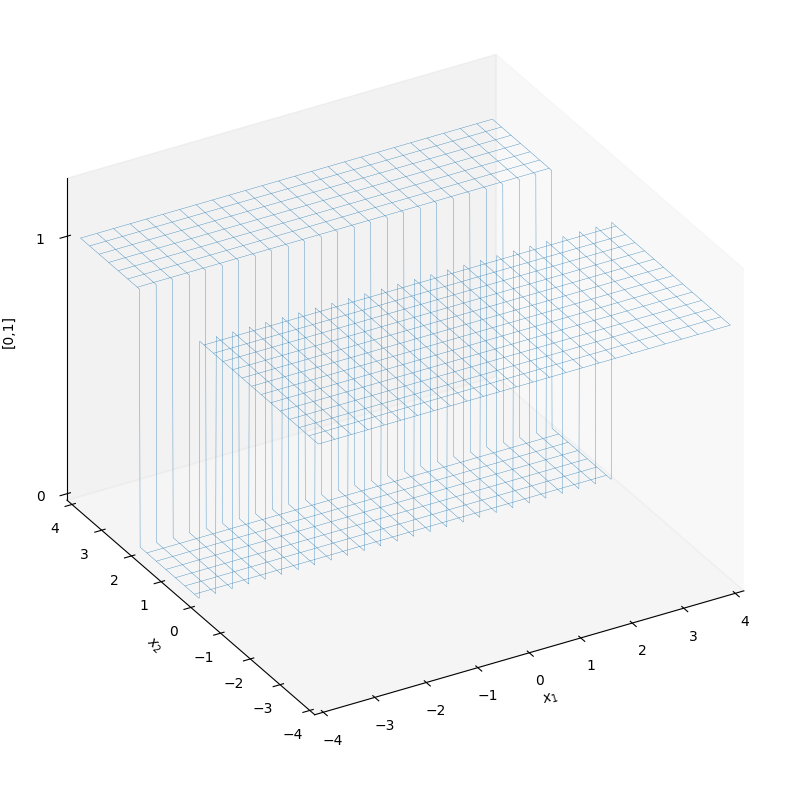

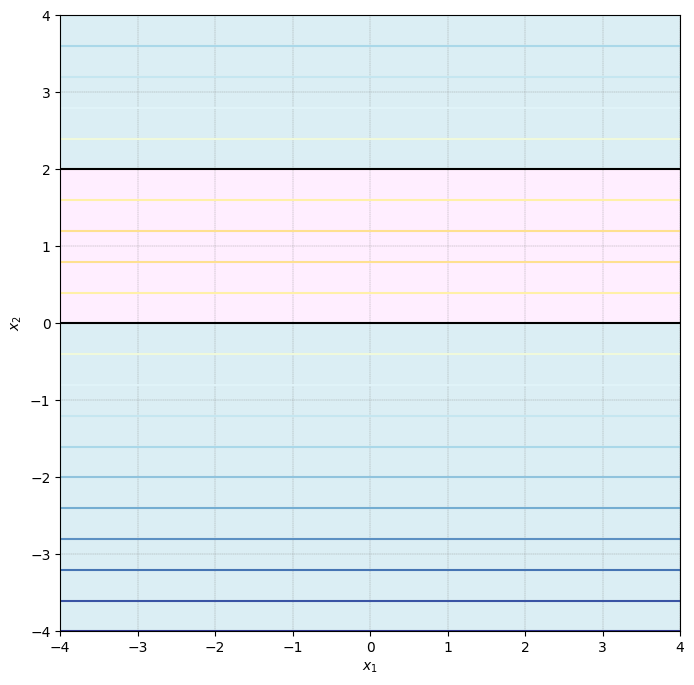

In [34]:
#%% x2 < 0 or x2 > 2
zz = -np.abs(yy - 1) + 1
mask_less_than_0 = (zz < 0) + 0

plot_3D_f_xy(xx,yy,zz)
plot_3D_mask(xx,yy,mask_less_than_0)
plot_2D_contour(xx,yy,zz,mask_less_than_0)

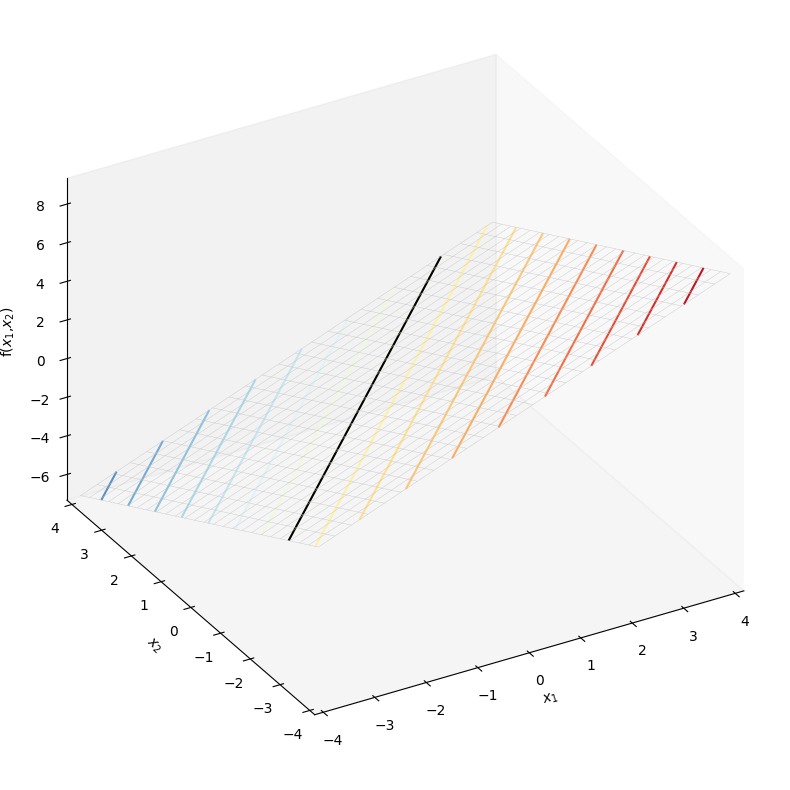

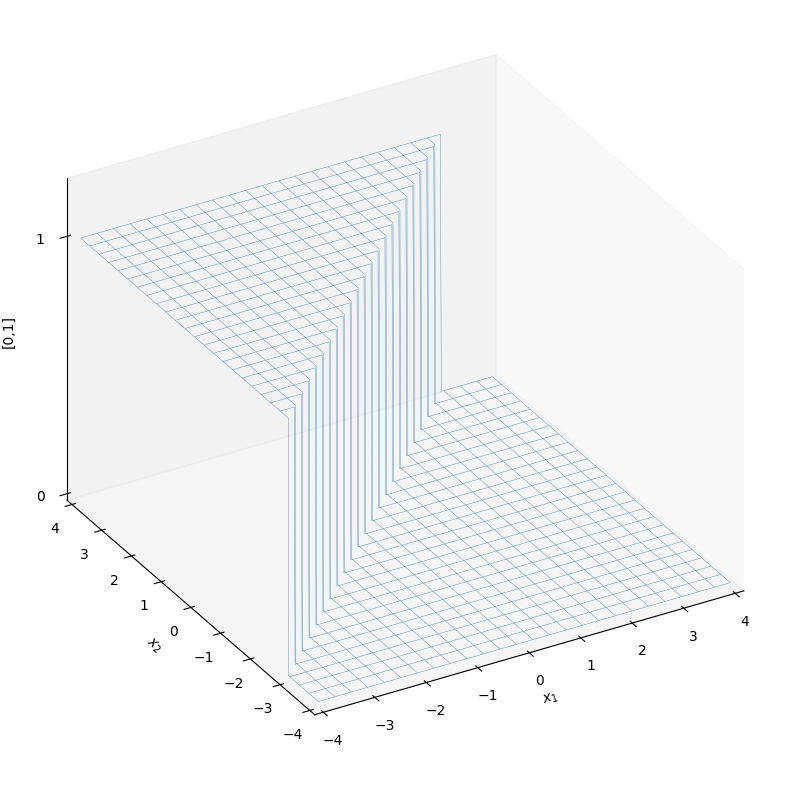

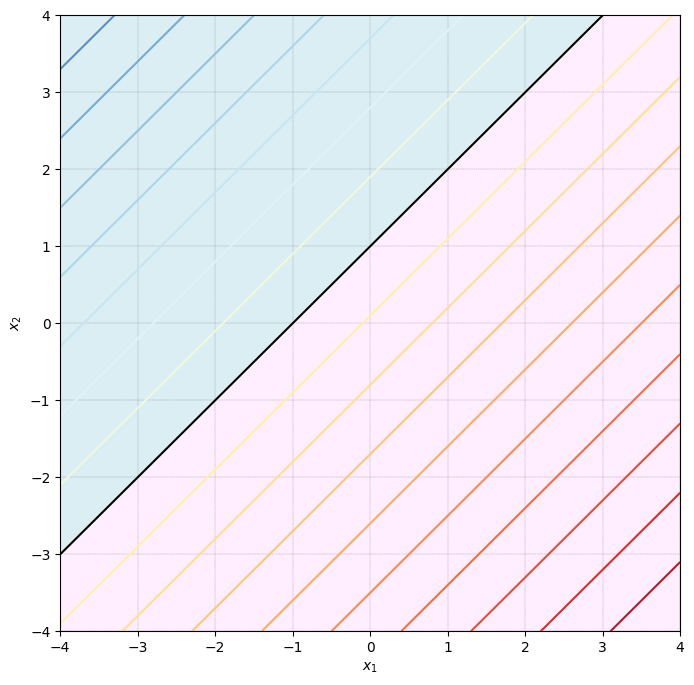

In [35]:
#%% x1 - x2 + 1 < 0
zz = xx - yy + 1
mask_less_than_0 = (zz < 0) + 0

plot_3D_f_xy(xx,yy,zz)
plot_3D_mask(xx,yy,mask_less_than_0)
plot_2D_contour(xx,yy,zz,mask_less_than_0)

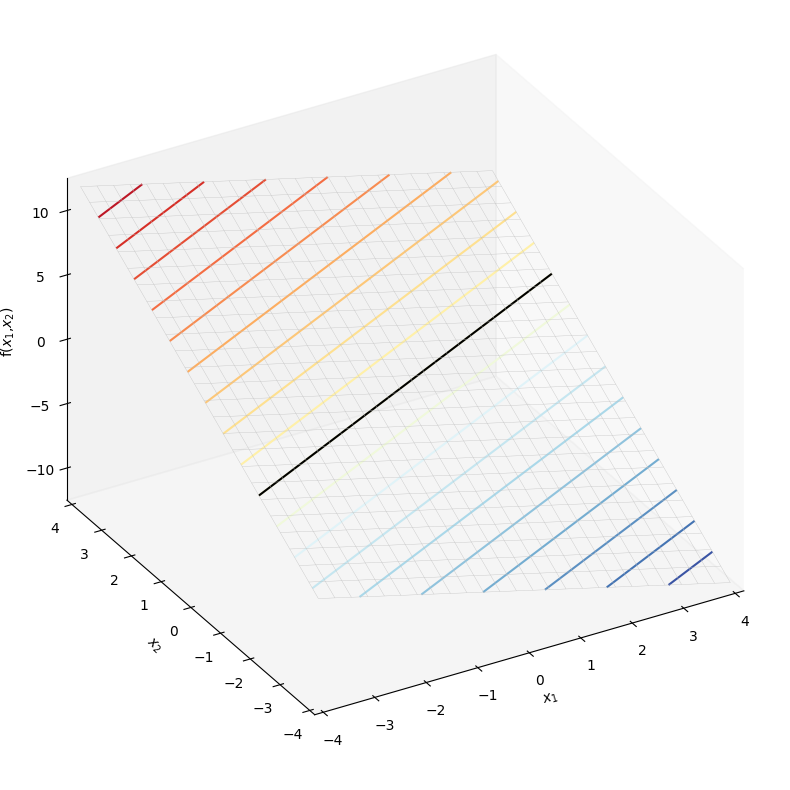

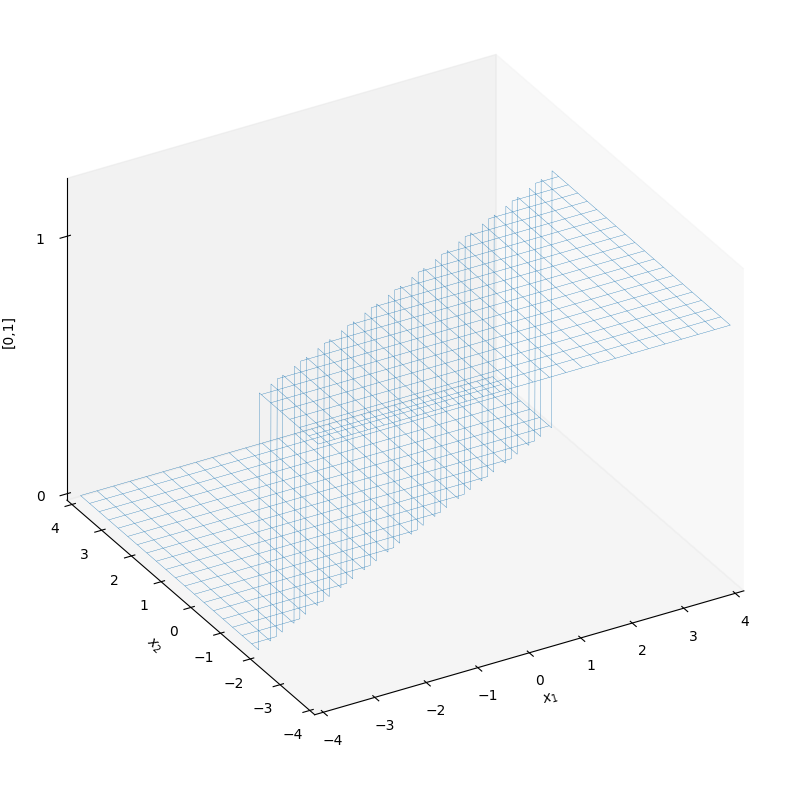

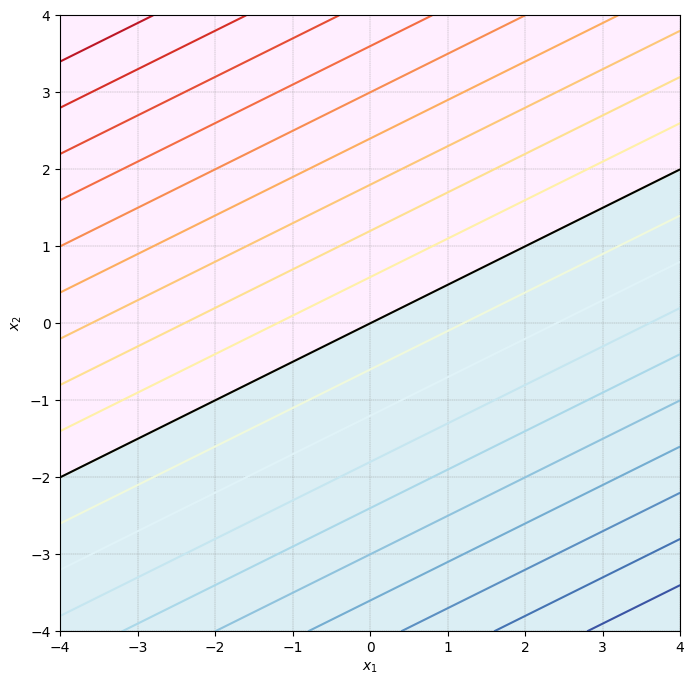

In [36]:
#%% x1 > 2*x2
zz = - xx + 2*yy
mask_less_than_0 = (zz < 0) + 0

plot_3D_f_xy(xx,yy,zz)
plot_3D_mask(xx,yy,mask_less_than_0)
plot_2D_contour(xx,yy,zz,mask_less_than_0)

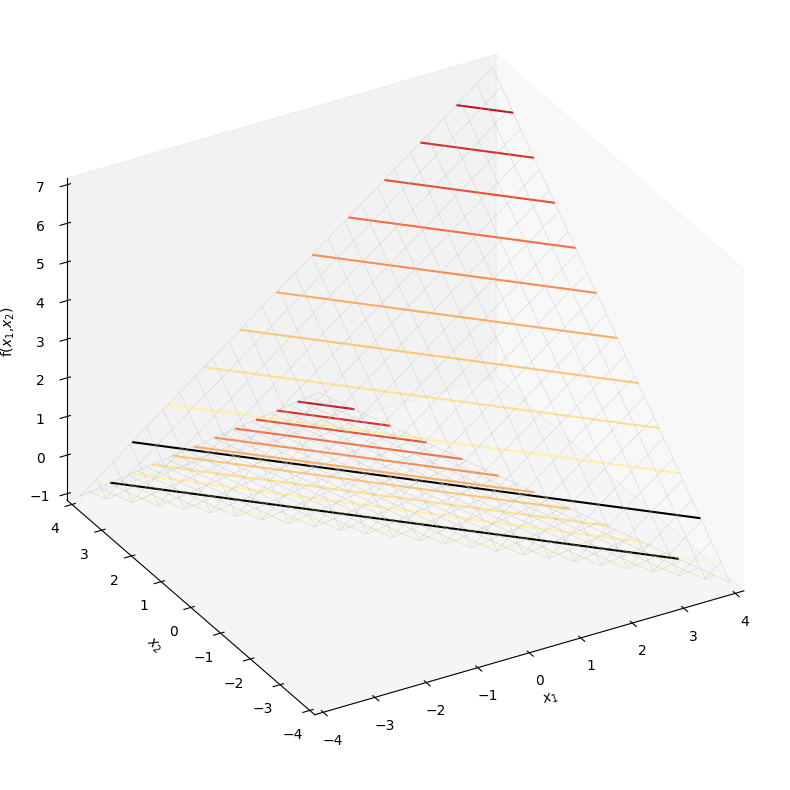

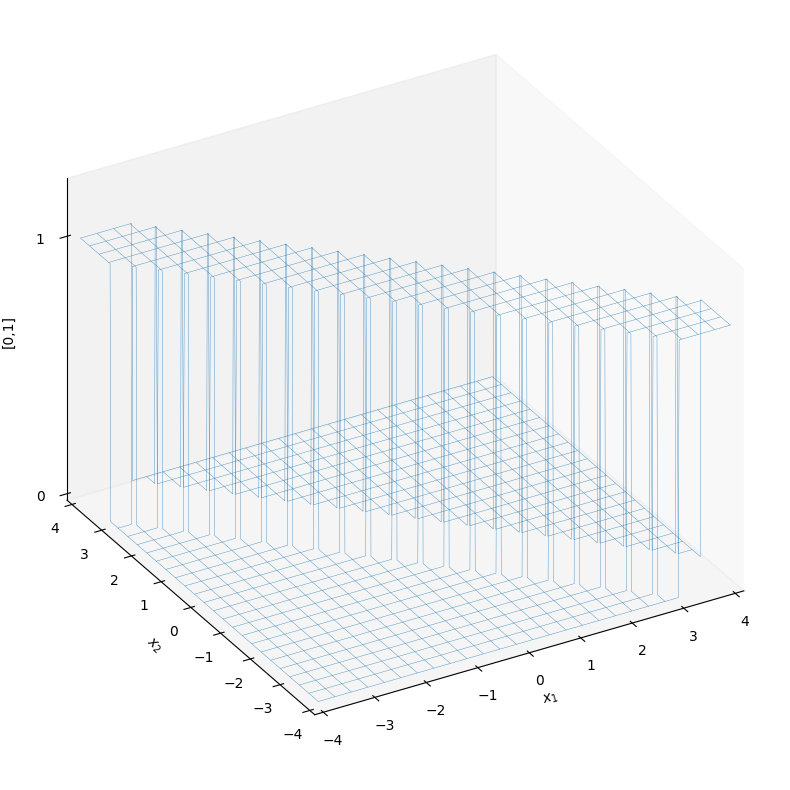

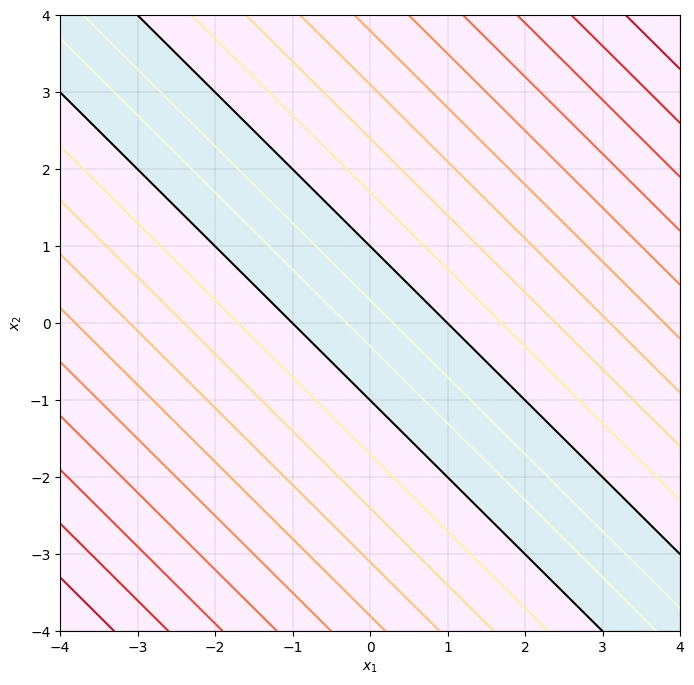

In [37]:
#%% |x1 + x2| < 1
zz = np.abs(xx + yy) - 1
mask_less_than_0 = (zz < 0) + 0

plot_3D_f_xy(xx,yy,zz)
plot_3D_mask(xx,yy,mask_less_than_0)
plot_2D_contour(xx,yy,zz,mask_less_than_0)

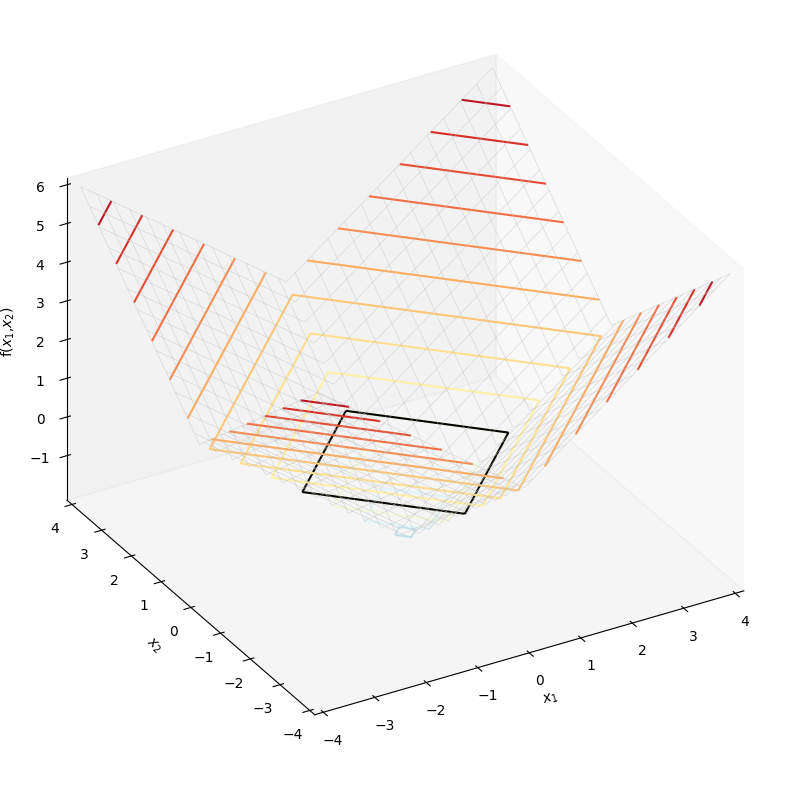

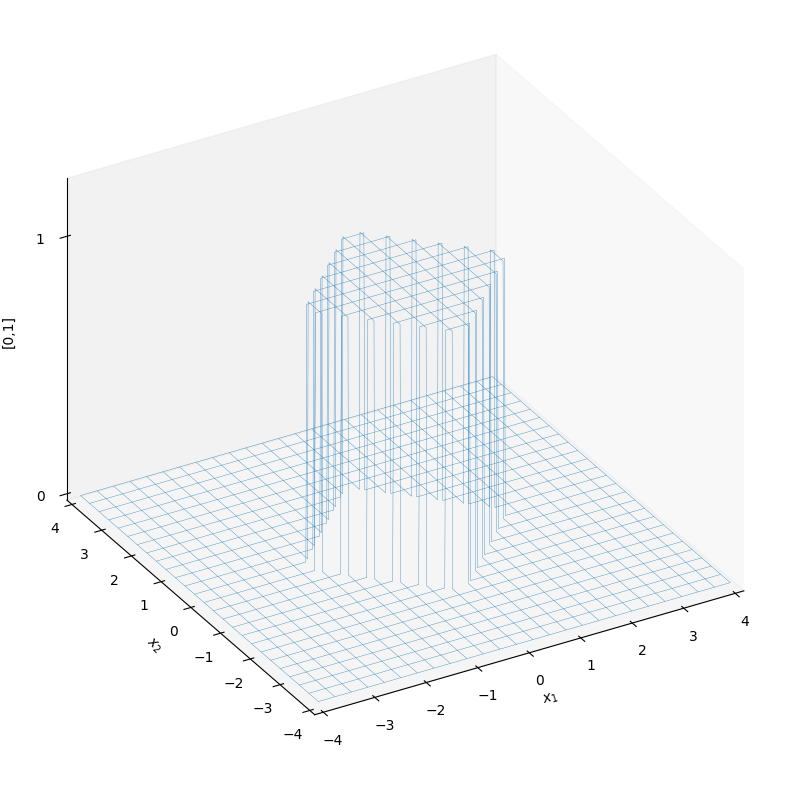

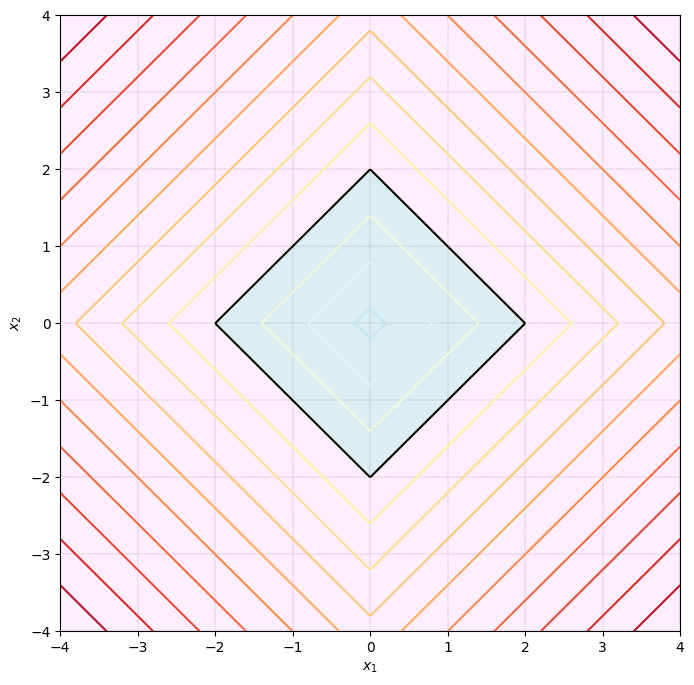

In [38]:
#%% |x1| + |x2| < 2
zz = np.abs(xx) + np.abs(yy) - 2
mask_less_than_0 = (zz < 0) + 0

plot_3D_f_xy(xx,yy,zz)
plot_3D_mask(xx,yy,mask_less_than_0)
plot_2D_contour(xx,yy,zz,mask_less_than_0)

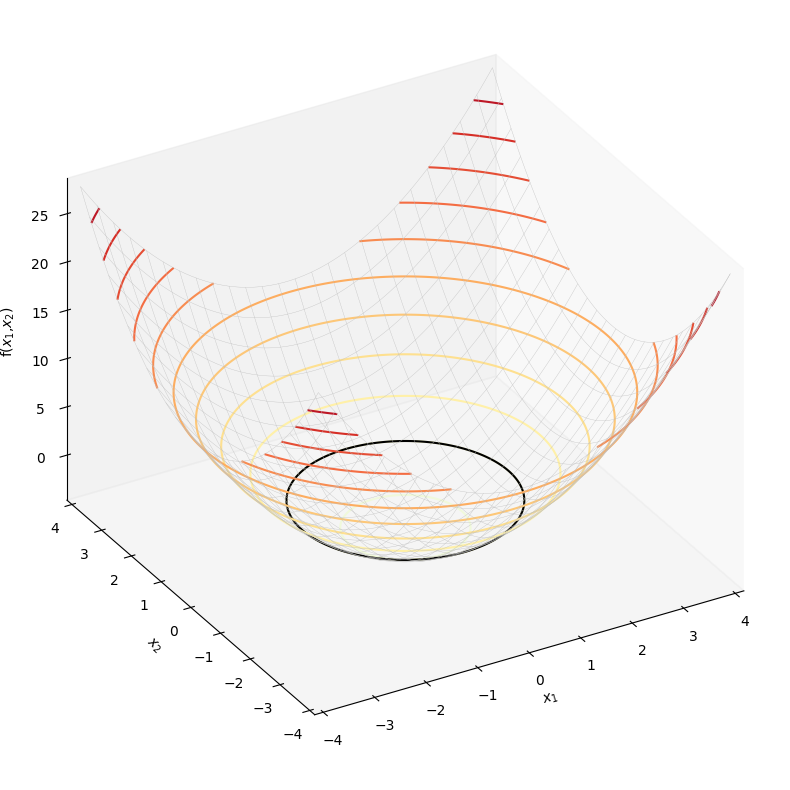

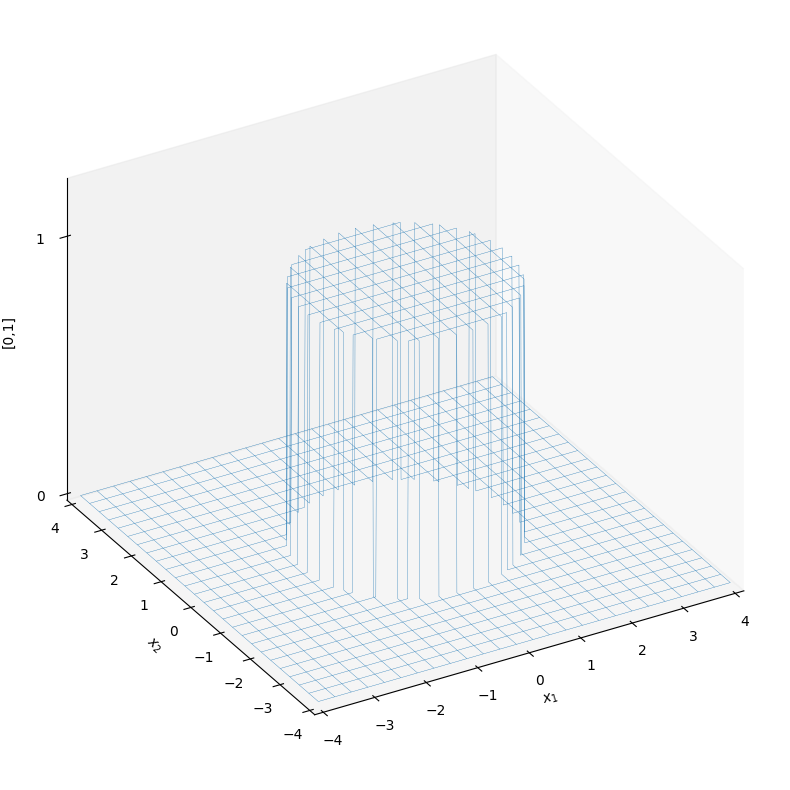

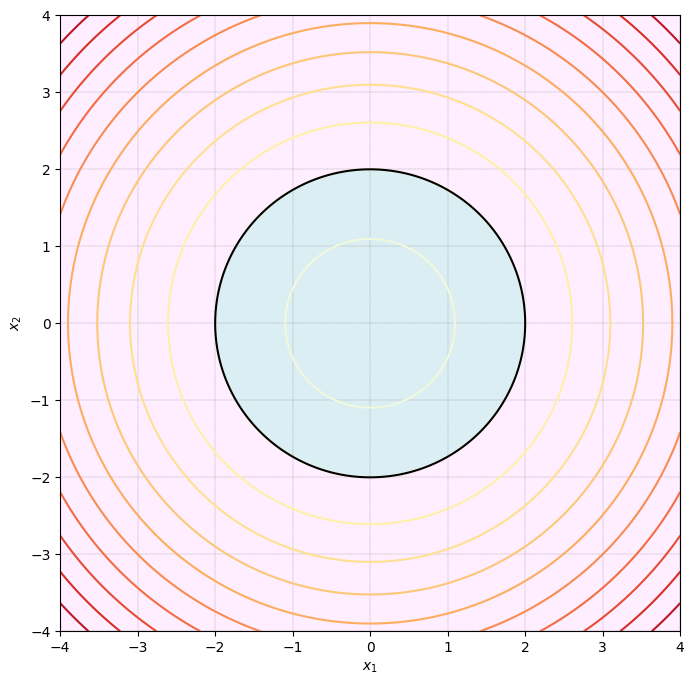

In [39]:
#%% x1**2 + x2**2 < 4
zz = xx**2 + yy**2 - 4
mask_less_than_0 = (zz < 0) + 0

plot_3D_f_xy(xx,yy,zz)
plot_3D_mask(xx,yy,mask_less_than_0)
plot_2D_contour(xx,yy,zz,mask_less_than_0)

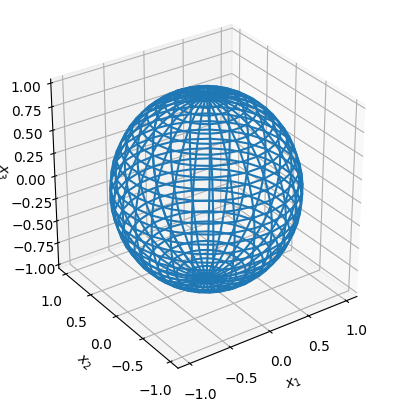

In [41]:
u = np.linspace(0, np.pi, 30)
v = np.linspace(0, 2 * np.pi, 30)

"spherical coordinate system -> 3d coordinate system."
x = np.outer(np.sin(u), np.sin(v))
y = np.outer(np.sin(u), np.cos(v))
z = np.outer(np.cos(u), np.ones_like(v))


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_aspect('equal')

ax.plot_wireframe(x, y, z)
ax.set_xlabel('$\it{x_1}$')
ax.set_ylabel('$\it{x_2}$')
ax.set_zlabel('$\it{x_3}$')
ax.view_init(azim=-125, elev=30)


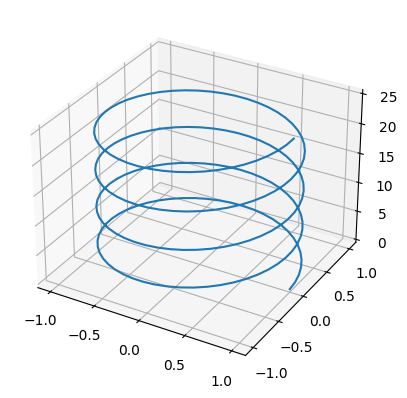

<Figure size 640x480 with 0 Axes>

In [43]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0,8*np.pi, 200)

# parametric equation of spiral
x1 = np.cos(t)
x2 = np.sin(t)
x3 = t

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(x1, x2, x3)

plt.show()
ax.set_proj_type('ortho')

ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.set_zlim(0,t.max())

plt.tight_layout()
ax.set_xlabel('$\it{x_1}$')
ax.set_ylabel('$\it{x_2}$')
ax.set_zlabel('$\it{x_3}$')

ax.view_init(azim=-135, elev=30)
ax.xaxis._axinfo["grid"].update({"linewidth":0.25, "linestyle" : ":"})
ax.yaxis._axinfo["grid"].update({"linewidth":0.25, "linestyle" : ":"})
ax.zaxis._axinfo["grid"].update({"linewidth":0.25, "linestyle" : ":"})
